# Final Project - Jay Zheng, Kurt Habazin, Darren Cen

> Add blockquote



## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'

# Check if the directory exists, and create it if it doesn't
project_full_path = drive_path + project_folder
if not os.path.exists(project_full_path):
    os.makedirs(project_full_path)
    print(f"Created project folder: {project_full_path}")
else:
    print(f"Project folder already exists: {project_full_path}")

os.chdir(project_full_path)
print(f"Changed working directory to: {os.getcwd()}")

Project folder already exists: /content/drive/MyDrive/Colab Notebooks/Econ_0150_Project/
Changed working directory to: /content/drive/MyDrive/Colab Notebooks/Econ_0150_Project


## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Open a dataset from your project folder in Google Drive
data = pd.read_csv('pm25_exposure_gdp.csv')
data.head()

,Entity,Code,Year,en_atm_pm25_mc_m3,ny_gdp_pcap_pp_kd,owid_region
0,Afghanistan,AFG,1990,64.174095,NaN,NaN
1,Afghanistan,AFG,1991,64.188156,NaN,NaN
2,Afghanistan,AFG,1992,64.210526,NaN,NaN
3,Afghanistan,AFG,1993,64.244140,NaN,NaN
4,Afghanistan,AFG,1994,64.291920,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [ ]:
# Data operations here
data = data.rename(columns={'en_atm_pm25_mc_m3': 'atm', 'owid_region':'region','ny_gdp_pcap_pp_kd': 'gdp'})

#adding in a log gdp to dataset
data['log_gdp'] = np.log(data['gdp'])

#dropping rows with missing value in 'gdp' or 'atm' columns
data = data.dropna(subset=['gdp', 'atm'])
data.head()

,Entity,Code,Year,atm,gdp,region,log_gdp
10,Afghanistan,AFG,2000,64.767280,1617.8264,NaN,7.388839
11,Afghanistan,AFG,2001,64.597570,1454.1108,NaN,7.282150
12,Afghanistan,AFG,2002,64.416885,1774.3087,NaN,7.481166
13,Afghanistan,AFG,2003,64.176230,1815.9282,NaN,7.504352
14,Afghanistan,AFG,2004,63.826610,1776.9182,NaN,7.482636


In [ ]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [ ]:
# Exploratory Data Analysis here (Log GDP per Capita and Air Pollution)

Text(0, 0.5, 'Year')

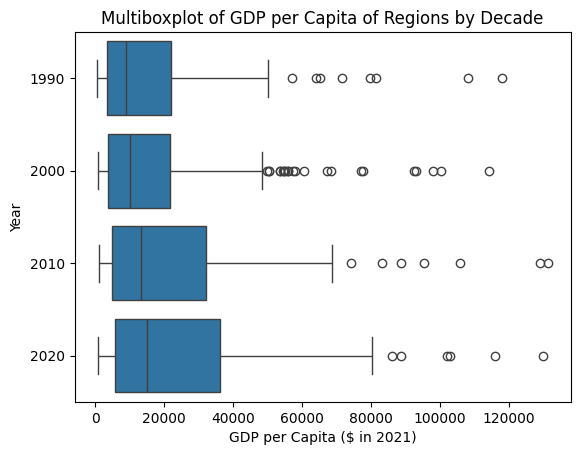

In [ ]:
#multiboxplot of log gdp in various years
sns.boxplot(data=data_decade, x='gdp', y='Year', orient='h')
plt.title('Multiboxplot of GDP per Capita of Regions by Decade')
plt.xlabel('GDP per Capita ($ in 2021)')
plt.ylabel('Year')



Text(0, 0.5, 'Year')

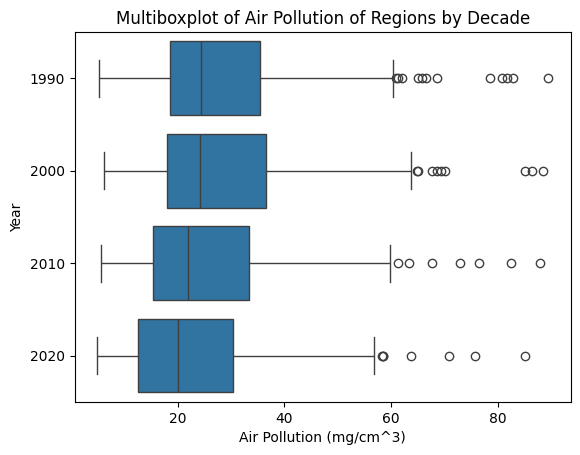

In [ ]:
#filter of years to every 10 year
data_decade = data[data['Year'].isin([1990, 2000, 2010, 2020])]

#multiboxplot of air pollution in various years
sns.boxplot(data=data_decade, x='atm', y='Year', orient='h')
plt.title('Multiboxplot of Air Pollution of Regions by Decade')
plt.xlabel('Air Pollution (mg/cm^3)')
plt.ylabel('Year')

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis: **Beta 1 is equal to zero**
2. Write down your statistical model: **linear regression on air pollution vs log GDP per capita**
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

Text(0, 0.5, 'Log GDP per Capita ($ in 2021)')

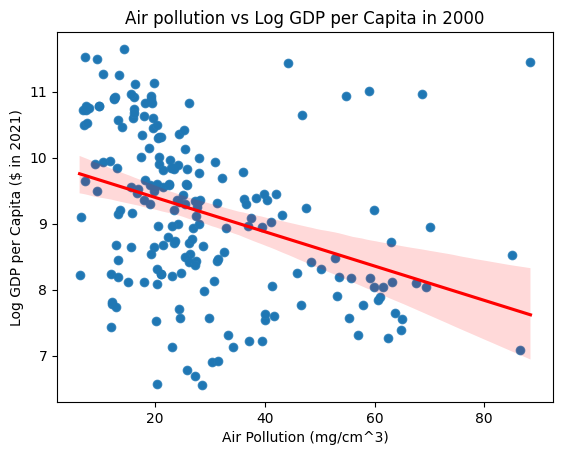

In [ ]:
#filter 2000
data_2000 = data[data['Year'] == 2000]

#scatterplot of air pollution and log gdp per captia in 2000
sns.scatterplot(data_2000, x='atm', y='log_gdp')
sns.regplot(data_2000, x='atm', y='log_gdp', line_kws={'color':'red'})
plt.title('Scatterplot of Air pollution vs Log GDP per Capita in 2000')
plt.xlabel('Air Pollution (mg/cm^3)')
plt.ylabel('Log GDP per Capita ($ in 2021)')


Text(0, 0.5, 'Log GDP per Capita ($ in 2021)')

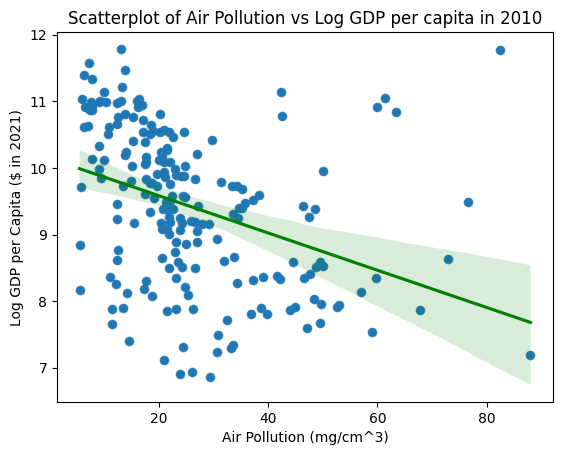

In [ ]:
#filter 2010
data_2010 = data[data['Year'] == 2010]
#scatterplot of air pollution and log gdp per captia in 2010
sns.scatterplot(data_2010, x='atm', y='log_gdp')
sns.regplot(data_2010, x='atm', y='log_gdp', line_kws={'color':'red'})
plt.title('Scatterplot of Air Pollution vs Log GDP per capita in 2010')
plt.xlabel('Air Pollution (mg/cm^3)')
plt.ylabel('Log GDP per Capita ($ in 2021)')


In [ ]:
#filter 2020
data_2020 = data[data['Year'] == 2020]
#scatterplot of air pollution and log gdp per captia in 2020
sns.scatterplot(data_2020, x='atm', y='log_gdp')
sns.regplot(data_2020, x='atm', y='log_gdp', line_kws={'color':'purple'})
plt.title('Scatterplot of Air Pollution vs Log GDP per Capita in 2020')
plt.xlabel('Air Pollution (mg/cm^3)')
plt.ylabel('Log GDP per Capita ($ in 2021)')


NameError: name 'data' is not defined

Text(0, 0.5, 'Log GDP per Capita ($ in 2021)')

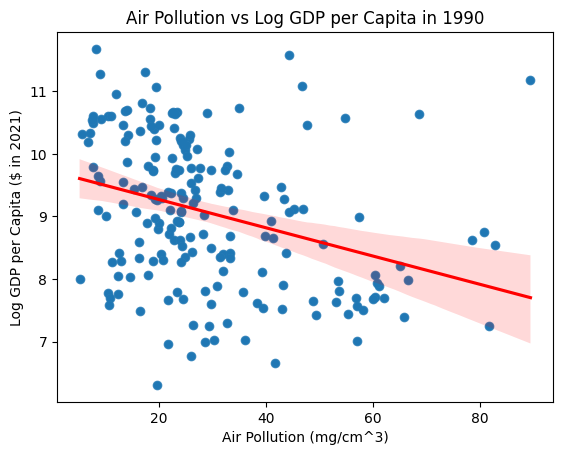

In [ ]:

#a second scatterplot of 1990
data_1990 = data[data['Year'] == 1990]
sns.scatterplot(data_1990, x='atm', y='log_gdp')
sns.regplot(data_1990, x='atm', y='log_gdp', line_kws={'color':'red'})
plt.title('Scatterplot of Air Pollution vs Log GDP per Capita in 1990')
plt.xlabel('Air Pollution (mg/cm^3)')
plt.ylabel('Log GDP per Capita ($ in 2021)')


In [ ]:
#regression model of 1990
model = smf.ols(formula='atm ~ log_gdp', data=data_1990)

# Print the p-values from the model fit
print(model.fit().pvalues)
model.fit().summary()

Intercept    9.040607e-14
log_gdp      2.724245e-06
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    atm   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     23.37
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.72e-06
Time:                        20:31:57   Log-Likelihood:                -816.99
No. Observations:                 195   AIC:                             1638.
Df Residuals:                     193   BIC:                             1645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.4841      9.020      8.036      0.000      54.694      90.274
log_gdp       -4.7716      0.987     -4.834      0.000      -6.718      -2.825
==============================================================================
Omnibus:                       51.064   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.609
Skew:                           1.289   Prob(JB):                     1.73e-21
Kurtosis:                       5.263   Cond. No.                         72.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#regression test of 2000
model = smf.ols(formula='atm ~ log_gdp', data=data_2000)
print(model.fit().pvalues)
model.fit().summary()

Intercept    3.650840e-16
log_gdp      7.064683e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    atm   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     31.36
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           7.06e-08
Time:                        20:32:15   Log-Likelihood:                -840.99
No. Observations:                 201   AIC:                             1686.
Df Residuals:                     199   BIC:                             1693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.8958      8.648      8.892      0.000      59.843      93.949
log_gdp       -5.2389      0.936     -5.600      0.000      -7.084      -3.394
==============================================================================
Omnibus:                       55.425   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.449
Skew:                           1.353   Prob(JB):                     7.67e-24
Kurtosis:                       5.321   Cond. No.                         71.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#regression test of 2010
model = smf.ols(formula='atm ~ log_gdp', data=data_2010)
print(model.fit().pvalues)
model.fit().summary()

Intercept    9.487930e-16
log_gdp      5.317763e-08
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    atm   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     31.98
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           5.32e-08
Time:                        20:32:34   Log-Likelihood:                -824.11
No. Observations:                 202   AIC:                             1652.
Df Residuals:                     200   BIC:                             1659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.2306      8.265      8.740      0.000      55.933      88.528
log_gdp       -4.9248      0.871     -5.655      0.000      -6.642      -3.208
==============================================================================
Omnibus:                       76.770   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.434
Skew:                           1.640   Prob(JB):                     6.09e-48
Kurtosis:                       6.883   Cond. No.                         78.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#regression test of 2020
model = smf.ols(formula='atm ~ log_gdp', data=data_2020)
print(model.fit().pvalues)
model.fit().summary()

Intercept    4.895539e-21
log_gdp      1.021743e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    atm   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     57.96
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.02e-12
Time:                        20:38:58   Log-Likelihood:                -812.34
No. Observations:                 203   AIC:                             1629.
Df Residuals:                     201   BIC:                             1635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.1976      7.969     10.566      0.000      68.484      99.911
log_gdp       -6.3265      0.831     -7.613      0.000      -7.965      -4.688
==============================================================================
Omnibus:                       71.678   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.989
Skew:                           1.535   Prob(JB):                     7.51e-43
Kurtosis:                       6.676   Cond. No.                         82.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""